# <font color = 'orange'> Diabetes Prediction Using Logistic Regression

---

## <font color='blue'> 1. Importing libraries 

In [1]:
# basic libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# for train test split of dependent and independent features
from sklearn.model_selection import train_test_split

# for scaling data
from sklearn.preprocessing import StandardScaler

# building logistic regression model
from sklearn.linear_model import LogisticRegression

# performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# to pickle scaler and model
import pickle

# to ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

---

## <font color='blue'> 2. Load Dataset, EDA and Feature Engineering

In [2]:
data = pd.read_csv('..\dataset\diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### <font color = '#AA00FF'> Observation :
* Shape = (768,9)
* All are in correct datatype.
* There are no null values in features.
* 8 Independent Features.
* 1 Dependent Feature ['Outcome'] - To be predicted.

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### <font color = '#AA00FF'> Observation :
We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.  
      
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.  

In [5]:
# here few misconception is there like BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column

data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


#### <font color = '#AA00FF'> Observation :
Minimum values problem is fixed.  

<AxesSubplot:>

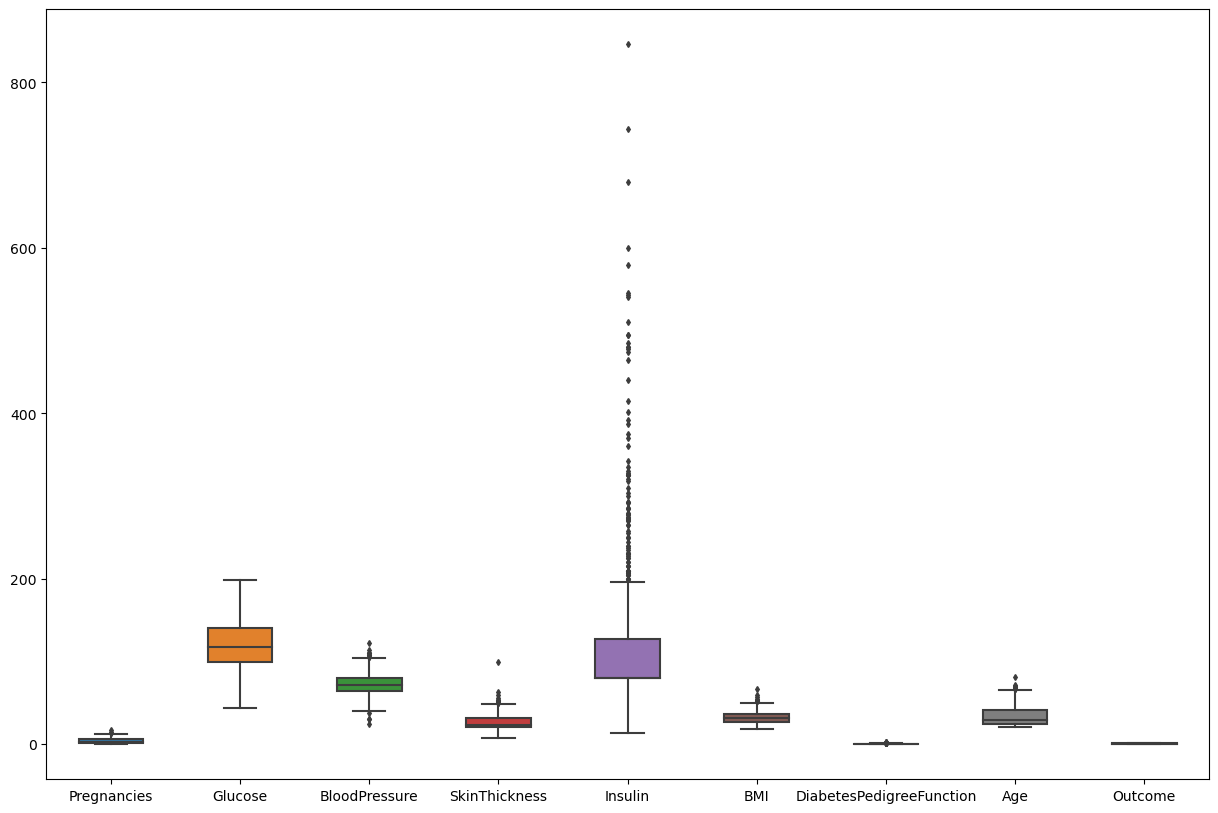

In [7]:
# let's check the outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

#### <font color = '#AA00FF'> Observation :
There are outliers present in some columns. We can handle in feature enginnering - standard scaling.

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


---

## <font color='blue'> 3. Segergate independent and dependent features

In [9]:
# x will be my independent features
x = data.iloc[:,:-1]

# y will be my dependent features
y = data.iloc[:,-1]

---

## <font color='blue'> 4. Train Test Split 

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

---

## <font color='blue'> 5. Standardization
    We also save 'scaler' pickle file into model folder

In [11]:
def scaler_standard(x_train,x_test):
    # scaling data
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # saving scaler as pickle file
    file = open('..\model\StandardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return x_train_scaled, x_test_scaled

In [12]:
x_train_scaled, x_test_scaled = scaler_standard(x_train,x_test)

---

## <font color='blue'> 6. Model Training Using Logistic Regression With GridSearchCV Hyperparameter Tuning.

In [13]:
from sklearn.model_selection import GridSearchCV

# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

# estimator
log_regressor = LogisticRegression()

# grid search cv
clf = GridSearchCV(log_regressor,             # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

# training model
clf.fit(x_train_scaled,y_train)

# checking the best parameters
print('Best Parameters')
print(clf.best_params_)
print()

# checking accuracy with best parameters
print('Score with best parameters')
print(clf.best_score_)
print()

Best Parameters
{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

Score with best parameters
0.763793103448276



#### <font color = '#AA00FF'> Observation :
We are getting 80% accuracy which is good because we have used l2 regularization to reduce overfitting.So, now we will use this model and pickle it.

In [14]:
# model training with best parameters given by grid search cv
log_regressor = LogisticRegression(C = 1.0, penalty = 'l2', solver = 'liblinear')
log_regressor.fit(x_train_scaled,y_train)

LogisticRegression(solver='liblinear')

---

## <font color='blue'> 7. Prediction

In [15]:
y_pred = log_regressor.predict(x_test_scaled)

---

## <font color='blue'> 8. Performance Metrics

In [16]:
print('Accuracy Score')
accuracy_score(y_pred,y_test)

Accuracy Score


0.796875

In [17]:
print('Confusion Matrix')
con_matrix = confusion_matrix(y_pred,y_test)
con_matrix

Confusion Matrix


array([[117,  26],
       [ 13,  36]], dtype=int64)

In [18]:
TP = con_matrix[0][0]
FP = con_matrix[0][1]
FN = con_matrix[1][0]
TN = con_matrix[1][1]

In [19]:
Accuracy = (TP + TN) / (TP + FP + FN + TN)
Accuracy

0.796875

In [20]:
Precision = TP / (TP + FP)
Precision

0.8181818181818182

In [21]:
Recall = TP / (TP + FN)
Recall

0.9

In [22]:
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)
F1_Score

0.8571428571428572

---

## <font color='blue'> 9. Create a pickle file logistic regression

In [23]:
file = open('..\model\ModelForPrediction.pkl','wb')
pickle.dump(log_regressor,file)
file.close()

---